In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 1.1 MB/s eta 0:00:0000:0100:030m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 956.4 kB/s eta 0:00:0000:010:07m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("grouped_upi_dynamic.csv")
df.head()

,user_id,transaction_id,current_amount,mean_amount,std_amount,max_amount,min_amount,unique_devices,primary_device_ratio,unique_locations,location_switch_rate,time_diff_mean,time_diff_std,min_time_gap,txn_count,is_fraud
0,1000,19,783.83,1551.085556,2333.778202,10883.86,741.77,18,0.055556,1,0.055556,49584.647059,23340.770320,5052.0,18,1
1,1001,32,1891.62,1938.394167,99.750317,2097.52,1746.40,12,0.083333,1,0.083333,36834.090909,22294.896503,5958.0,12,0
2,1002,51,1603.78,1540.666667,253.946267,2028.60,1128.81,18,0.055556,1,0.055556,42734.764706,28187.013973,2522.0,18,0
3,1003,62,1133.21,1274.256000,186.975195,1494.30,933.85,10,0.100000,1,0.100000,49742.333333,16793.639198,25476.0,10,0
4,1004,75,746.37,999.230000,1635.026775,6122.89,10.00,12,0.083333,2,0.250000,29171.363636,12017.809977,4982.0,12,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               5000 non-null   int64  
 1   transaction_id        5000 non-null   int64  
 2   current_amount        5000 non-null   float64
 3   mean_amount           5000 non-null   float64
 4   std_amount            5000 non-null   float64
 5   max_amount            5000 non-null   float64
 6   min_amount            5000 non-null   float64
 7   unique_devices        5000 non-null   int64  
 8   primary_device_ratio  5000 non-null   float64
 9   unique_locations      5000 non-null   int64  
 10  location_switch_rate  5000 non-null   float64
 11  time_diff_mean        5000 non-null   float64
 12  time_diff_std         5000 non-null   float64
 13  min_time_gap          5000 non-null   float64
 14  txn_count             5000 non-null   int64  
 15  is_fraud             

In [4]:
df = df.drop(["transaction_id","user_id"], axis=1)

In [5]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   current_amount        5000 non-null   float64
 1   mean_amount           5000 non-null   float64
 2   std_amount            5000 non-null   float64
 3   max_amount            5000 non-null   float64
 4   min_amount            5000 non-null   float64
 5   unique_devices        5000 non-null   int64  
 6   primary_device_ratio  5000 non-null   float64
 7   unique_locations      5000 non-null   int64  
 8   location_switch_rate  5000 non-null   float64
 9   time_diff_mean        5000 non-null   float64
 10  time_diff_std         5000 non-null   float64
 11  min_time_gap          5000 non-null   float64
 12  txn_count             5000 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 507.9 KB


In [6]:
y

0       1
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: is_fraud, Length: 5000, dtype: int64

In [7]:
z=0
o=0
for i in y:
    if i==0:
        z+=1
    else:
        o+=1
print(z , o)

4285 715


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42, class_weight="balanced"
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10, random_state=42, class_weight="balanced"
    ),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, max_depth=8, learning_rate=0.1, 
        scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), # handle imbalance
        use_label_encoder=False, eval_metric="logloss", random_state=42
    ),
}

In [10]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "ROC-AUC": auc
    }

Training Logistic Regression...
Training Random Forest...
Training Decision Tree...
Training XGBoost...


/home/Shiva-Arch/Desktop/UPI fraud Detection/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:37:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
comparison_df = pd.DataFrame(results).T
print("Model Comparison:")
print(comparison_df)

Model Comparison:
                     Precision    Recall  F1-score   ROC-AUC
Logistic Regression        1.0  0.993007  0.996491  0.999992
Random Forest              1.0  0.993007  0.996491  1.000000
Decision Tree              1.0  1.000000  1.000000  1.000000
XGBoost                    1.0  1.000000  1.000000  1.000000


In [19]:
pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


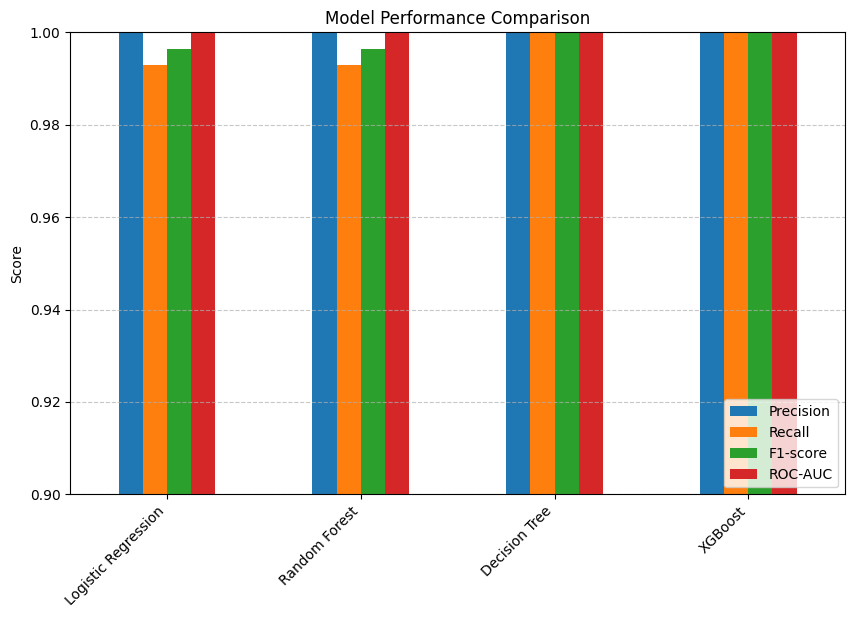

In [12]:
import matplotlib.pyplot as plt

# Plot Precision, Recall, F1-score, and ROC-AUC for each model
comparison_df.plot(kind="bar", figsize=(10,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)   # since your scores are all very high
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# Choose best model (say XGBoost here)
best_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       143

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[857   0]
 [  0 143]]


/home/Shiva-Arch/Desktop/UPI fraud Detection/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:37:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
df = pd.DataFrame([
    {"transaction_id": 1, "user_id": 1000, "transaction_amount": 1120.50, "merchant_id": 321, "device_id": 6102, "transaction_time": "2023-01-02 09:12:11", "location": "Chennai"},
    {"transaction_id": 2, "user_id": 1000, "transaction_amount": 890.30,  "merchant_id": 654, "device_id": 6220, "transaction_time": "2023-01-02 17:45:26", "location": "Chennai"},
    {"transaction_id": 3, "user_id": 1000, "transaction_amount": 1345.75, "merchant_id": 478, "device_id": 6450, "transaction_time": "2023-01-03 08:01:19", "location": "Chennai"},
    {"transaction_id": 4, "user_id": 1000, "transaction_amount": 760.90,  "merchant_id": 812, "device_id": 6599, "transaction_time": "2023-01-03 22:14:40", "location": "Chennai"},
    {"transaction_id": 5, "user_id": 1000, "transaction_amount": 1189.20, "merchant_id": 233, "device_id": 6021, "transaction_time": "2023-01-04 10:29:55", "location": "Chennai"},
    {"transaction_id": 6, "user_id": 1000, "transaction_amount": 1015.00, "merchant_id": 567, "device_id": 6888, "transaction_time": "2023-01-04 15:43:17", "location": "Chennai"},
    {"transaction_id": 7, "user_id": 1000, "transaction_amount": 940.80,  "merchant_id": 312, "device_id": 6990, "transaction_time": "2023-01-05 09:57:32", "location": "Chennai"},
    {"transaction_id": 8, "user_id": 1000, "transaction_amount": 1230.60, "merchant_id": 715, "device_id": 6355, "transaction_time": "2023-01-05 19:20:44", "location": "Chennai"},
    {"transaction_id": 9, "user_id": 1000, "transaction_amount": 875.25,  "merchant_id": 289, "device_id": 6522, "transaction_time": "2023-01-06 11:35:03", "location": "Chennai"},
    {"transaction_id": 10,"user_id": 1000, "transaction_amount": 1095.40, "merchant_id": 942, "device_id": 6671, "transaction_time": "2023-01-06 22:48:29", "location": "Chennai"},
])

In [25]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])


In [26]:
grouped_features = []
for user_id, user_txns in df.groupby("user_id"):
    user_txns = user_txns.reset_index(drop=True)

    # Use all transactions except the last one for features
    history = user_txns.iloc[:-1]
    current = user_txns.iloc[-1]   # latest txn

    # Build feature dict
    time_diffs = history["transaction_time"].diff().dt.total_seconds()
    feature_dict = {
        "user_id": user_id,
        "transaction_id": current["transaction_id"],
        "current_amount": current["transaction_amount"],
        "mean_amount": history["transaction_amount"].mean(),
        "std_amount": history["transaction_amount"].std(),
        "max_amount": history["transaction_amount"].max(),
        "min_amount": history["transaction_amount"].min(),
        "unique_devices": history["device_id"].nunique(),
        "primary_device_ratio": (history["device_id"].value_counts().max() / len(history)) if len(history) > 0 else 1.0,
        "unique_locations": history["location"].nunique(),
        "location_switch_rate": ((history["location"] != history["location"].shift()).mean()) if len(history) > 1 else 0.0,
        "time_diff_mean": time_diffs.mean() if len(history) > 1 else 0.0,
        "time_diff_std": time_diffs.std() if len(history) > 1 else 0.0,
        "min_time_gap": time_diffs.min() if len(history) > 1 else 0.0,
        "txn_count": len(history),    }
   



    grouped_features.append(feature_dict)

test_features = pd.DataFrame(grouped_features)


In [27]:
test_features = test_features.drop(["user_id", "transaction_id"], axis=1)

In [28]:
test_features

,current_amount,mean_amount,std_amount,max_amount,min_amount,unique_devices,primary_device_ratio,unique_locations,location_switch_rate,time_diff_mean,time_diff_std,min_time_gap,txn_count
0,1095.4,1040.922222,192.503169,1345.75,760.9,9,0.111111,1,0.111111,44271.5,15569.479008,18802.0,9


In [29]:
y_pred = models["Random Forest"].predict(test_features)
y_proba = models["Random Forest"].predict_proba(test_features)[:, 1]

test_features["fraud_prediction"] = y_pred
test_features["fraud_probability"] = y_proba

print(test_features[["fraud_prediction", "fraud_probability"]])

   fraud_prediction  fraud_probability
0                 0           0.001852


In [30]:
best_model = models["Random Forest"]

In [31]:
import joblib

# assume your trained model is called `best_model`
joblib.dump(best_model, "upi_fraud_model.pkl")
print("Model saved as upi_fraud_model.pkl")


Model saved as upi_fraud_model.pkl
